<a href="https://colab.research.google.com/github/wiemila/ML_ISE-strzykawki/blob/main/Cond_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Dane pomidory.csv to Dane pomidory.csv


In [127]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Dane pomidory.csv']),delimiter=';')

In [128]:
data

,Nazwa próbki,Kod,Rodzaj próbki,Powtórzenie,Indeks,Nazwa kodowana,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,NH4+ 3,NH4+ 2,A5-(Cl-),A-10(Cl-),pH,M
0,Daktyle,1,1,1,1,1_1,0.059854,0.057588,0.065035,0.057519,0.051446,0.078237,0.072612,0.002363,0.002831,0.040896,0.050755,5.32,0.052790
1,Daktyle,1,1,2,2,1_2,0.057857,0.056254,0.065364,0.057579,0.052227,0.078046,0.070765,0.001785,0.000054,0.042695,0.052439,5.32,0.052790
2,Daktyle,1,1,3,3,1_3,0.058485,0.055429,0.064738,0.057005,0.052502,0.076055,0.071158,-0.002705,-0.002033,0.039837,0.052399,5.32,0.052790
3,barszcz diluted 45mlH2O5ml,2,2,1,4,2_1,0.038312,0.039212,0.019193,0.011543,0.006914,0.059757,0.061617,0.018991,0.017514,-0.025790,-0.017516,4.11,0.051154
4,barszcz diluted 45mlH2O5ml,2,2,2,5,2_2,0.037089,0.036088,0.019765,0.012179,0.008509,0.058625,0.056393,0.018885,0.015818,-0.025828,-0.018449,4.11,0.051154
5,barszcz diluted 45mlH2O5ml,2,2,3,6,2_3,0.035396,0.034784,0.019934,0.012076,0.008804,0.063084,0.060339,0.023850,0.015969,-0.026117,-0.018555,4.11,0.051154
6,Tarczyn pikantny,3,3,1,7,3_1,0.040190,0.045397,0.052381,0.046022,0.042542,0.066758,0.064424,0.013696,0.013792,0.036756,0.041368,4.19,0.063942
7,Tarczyn pikantny,3,3,2,8,3_2,0.039192,0.043449,0.053069,0.046838,0.039626,0.067226,0.066602,0.015298,0.014737,0.036688,0.042073,4.19,0.063942
8,Tarczyn pikantny,3,3,3,9,3_3,0.037254,0.042032,0.052958,0.047610,0.040037,0.066217,0.065831,0.014268,0.013817,0.037570,0.042224,4.19,0.063942
9,tymbark klasyczny E190127,4,3,1,10,4_1,0.053386,0.044935,0.053164,0.046879,0.042424,0.065351,0.063011,0.014777,0.013724,0.036836,0.042851,4.31,0.063942


In [129]:
data.columns

Index(['Nazwa próbki', 'Kod', 'Rodzaj próbki', 'Powtórzenie', 'Indeks',
       'Nazwa kodowana', 'DB 5', 'DB 4 ', 'V5', 'V5_2?', 'V1', 'K+ 3', 'K+ 5',
       'NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)', 'pH', 'M'],
      dtype='object')

In [130]:
X_PCA_All = data[['DB 5', 'DB 4 ', 'V5', 'V5_2?', 'V1', 'K+ 3', 'K+ 5','NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)', 'pH']].values
X_PCA_bezpH= data[['DB 5', 'DB 4 ', 'V5', 'V5_2?', 'V1', 'K+ 3', 'K+ 5','NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)']].values
X_PCA_bezValipH= data[['DB 5', 'DB 4 ', 'K+ 3', 'K+ 5','NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)']].values
X_PCA_Val_NH4= data[['V5', 'V5_2?', 'V1','NH4+ 3', 'NH4+ 2']].values
X_PCA_Val_An= data[['V5', 'V5_2?', 'V1', 'A5-(Cl-)', 'A-10(Cl-)']].values
X_PCA_soloVal= data[['V5', 'V5_2?', 'V1']].values
X_PCA_Val_An_pH= data[['V5', 'V5_2?', 'V1', 'A5-(Cl-)', 'A-10(Cl-)', 'pH']].values

In [131]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler;
scaler = preprocessing.StandardScaler().fit(X_PCA_All)
X_PCA_All_scaled = scaler.transform(X_PCA_All)

scaler = preprocessing.StandardScaler().fit(X_PCA_bezpH)
X_PCA_bezpH_scaled = scaler.transform(X_PCA_bezpH)

scaler = preprocessing.StandardScaler().fit(X_PCA_bezValipH)
X_PCA_bezValipH_scaled = scaler.transform(X_PCA_bezValipH)

scaler = preprocessing.StandardScaler().fit(X_PCA_Val_NH4)
X_PCA_Val_NH4_scaled = scaler.transform(X_PCA_Val_NH4)

scaler = preprocessing.StandardScaler().fit(X_PCA_Val_An)
X_PCA_Val_An_scaled = scaler.transform(X_PCA_Val_An)

scaler = preprocessing.StandardScaler().fit(X_PCA_soloVal)
X_PCA_soloVal_scaled = scaler.transform(X_PCA_soloVal)

scaler = preprocessing.StandardScaler().fit(X_PCA_Val_An_pH)
X_PCA_Val_An_pH_scaled = scaler.transform(X_PCA_Val_An_pH)

#PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_PCA_Val_An_pH_scaled)
x_pca = pca.transform(X_PCA_Val_An_pH_scaled)

In [11]:
pca.explained_variance_ratio_

array([0.82546476, 0.12867286])

<ipython-input-12-bfb951c733f4>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')


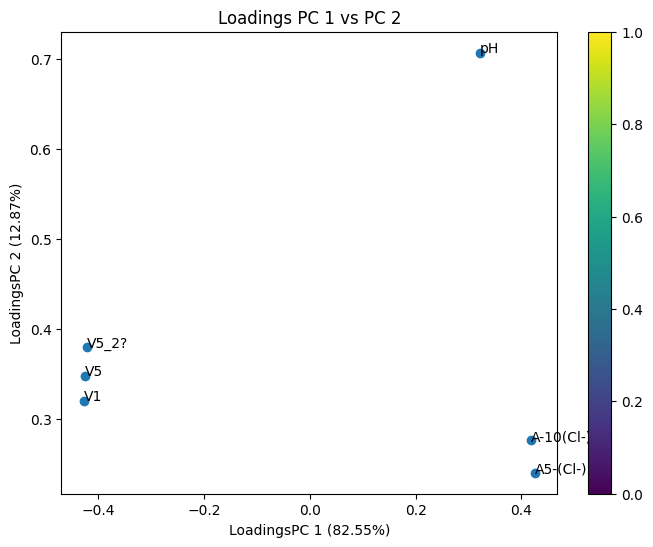

In [12]:
name = data[['V5', 'V5_2?', 'V1', 'A5-(Cl-)', 'A-10(Cl-)', 'pH']]
plt.figure(figsize=(8,6))
plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')
plt.title('Loadings PC 1 vs PC 2')
plt.xlabel('LoadingsPC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('LoadingsPC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
for i, txt in enumerate(name):
    plt.annotate(txt, (pca.components_[0,:][i],pca.components_[1,:][i]))
plt.colorbar();

In [13]:
dfloadings = pd.DataFrame (pca.components_[0,:],pca.components_[1,:])
dfloadings

,0
0.347775,-0.424972
0.379565,-0.421780
0.319739,-0.427626
0.239918,0.425138
0.275757,0.417344
0.706504,0.322054


'1-dates, 2-beetroot soup, 3-tomato juice, 4-tomato passata, 5-banana juice, 6-mineral water, 7-pharmaceutical supplements'

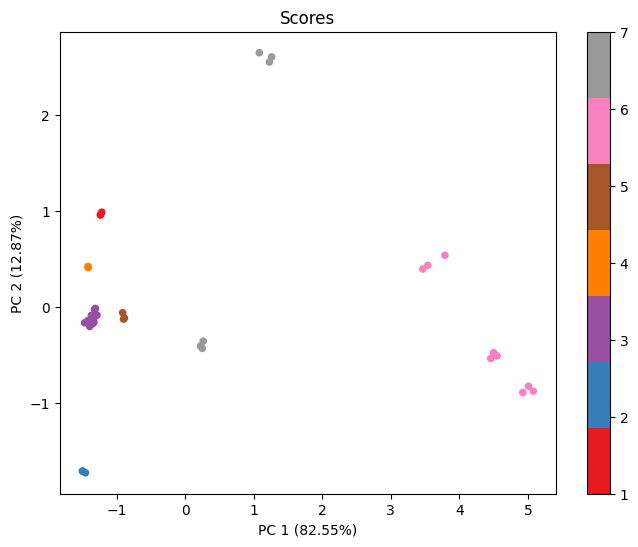

In [14]:
plt.figure(figsize=(8,6))
cmap = plt.get_cmap('Set1',7)
plt.scatter(x_pca[:,0],x_pca[:,1],cmap=cmap, c= data['Rodzaj próbki'], marker = '.',s=80)
plt.title('Scores')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
plt.colorbar();
'1-dates, 2-beetroot soup, 3-tomato juice, 4-tomato passata, 5-banana juice, 6-mineral water, 7-pharmaceutical supplements'

In [15]:
dfscores = pd.DataFrame (x_pca[:,0],x_pca[:,1])
dfscores

,0
0.955891,-1.238334
0.984966,-1.218069
0.962058,-1.234224
-1.731624,-1.456624
-1.715143,-1.494476
-1.714476,-1.501825
-0.128705,-1.359574
-0.133446,-1.339063
-0.119132,-1.340343
-0.028330,-1.324851


#Regression

In [132]:
y = data[['M']].values
y

array([[0.05279042],
       [0.05279042],
       [0.05279042],
       [0.05115351],
       [0.05115351],
       [0.05115351],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06138421],
       [0.06138421],
       [0.06138421],
       [0.07673027],
       [0.07673027],
       [0.07673027],
       [0.03836513],
       [0.03836513],
       [0.03836513],
       [0.00019183],
       [0.00019183],
       [0.00019183],
       [0.00115863],
       [0.00115863],
       [0.00115863],
       [0.00017904],
       [0.00017904],
       [0.00017904],
       [0.01278838],
       [0.01278838],
       [0.01278838],
       [0.02532099],
       [0.02532099],
       [0.02532099],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.063

In [421]:
XforReg = pd.DataFrame(X_PCA_All_scaled)

In [432]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XforReg, y, test_size = 0.25, random_state=1)

In [433]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11
33,-2.684653,-2.717469,-2.355089,-2.464348,-2.244611,-2.382477,-1.740106,-2.119624,-2.111973,2.141424,1.823370,0.794128
23,0.673539,0.675830,0.792038,0.744885,0.784729,0.853219,0.731415,0.755515,0.770224,-0.313624,-0.513313,-0.259411
38,-0.311923,-0.157765,-0.241635,-0.270231,-0.216548,-0.219696,-0.188877,-0.600057,-0.574980,-0.068594,0.144402,-0.286658
36,-0.196474,-0.101719,-0.119162,-0.292426,-0.207005,-0.004966,0.110249,-0.623580,-0.553414,0.002795,0.219009,-0.286658
2,0.926017,0.882562,0.849980,0.818007,0.856278,0.750151,0.733309,0.284215,0.333480,-0.408697,-0.240800,0.349098
3,0.474081,0.441384,-0.286195,-0.238046,-0.224141,0.366245,0.500289,0.740360,0.726079,-1.771824,-1.868334,-0.749852
31,-1.426173,-1.436749,-1.373709,-1.256150,-1.218782,-1.748983,-1.822654,-1.483576,-1.606429,1.757735,1.664796,1.211911
26,0.226972,0.200228,0.379748,0.374480,0.356831,0.206971,0.236610,0.078050,0.083733,-0.343156,-0.286619,-0.504632
44,0.435317,0.470811,0.548281,0.576641,0.541090,0.595511,0.526141,0.597677,0.629653,-0.477519,-0.461401,-0.713523
27,-1.726028,-1.916326,-2.066402,-2.236911,-2.230523,-1.872826,-1.843085,-1.970681,-2.138434,1.600889,1.587650,1.339062


##PCR

In [434]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
pca2 = PCA(n_components=2)
pca2.fit(X_train)
X_pca_train = pca2.transform(X_train)
X_pca_test = pca2.transform(X_test)
regressorPCR = LinearRegression()
regressorPCR.fit(X_pca_train, y_train)
predictions_lr_pca = regressorPCR.predict(X_pca_test)
predcopyPCR = pd.DataFrame(predictions_lr_pca)

##PLS

In [435]:
from sklearn.cross_decomposition import PLSRegression
regressorPLS = PLSRegression(n_components=2)
regressorPLS.fit(X_train, y_train)
predictionsPLS =regressorPLS.predict(X_test)
predcopyPLS = pd.DataFrame(predictionsPLS)

##MLR

In [436]:
regressorMLR = LinearRegression()
regressorMLR.fit(X_train, y_train)
predictions_mlr = regressorMLR.predict(X_test)
predcopyMLR = pd.DataFrame(predictions_mlr)

##RF

In [437]:
from sklearn.ensemble import RandomForestRegressor
regressorRF=RandomForestRegressor()
regressorRF.fit(X_train, y_train)
predictions_rfreg = regressorRF.predict(X_test)
predcopyRF = pd.DataFrame(predictions_rfreg)

<ipython-input-437-a5343fd84545>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressorRF.fit(X_train, y_train)


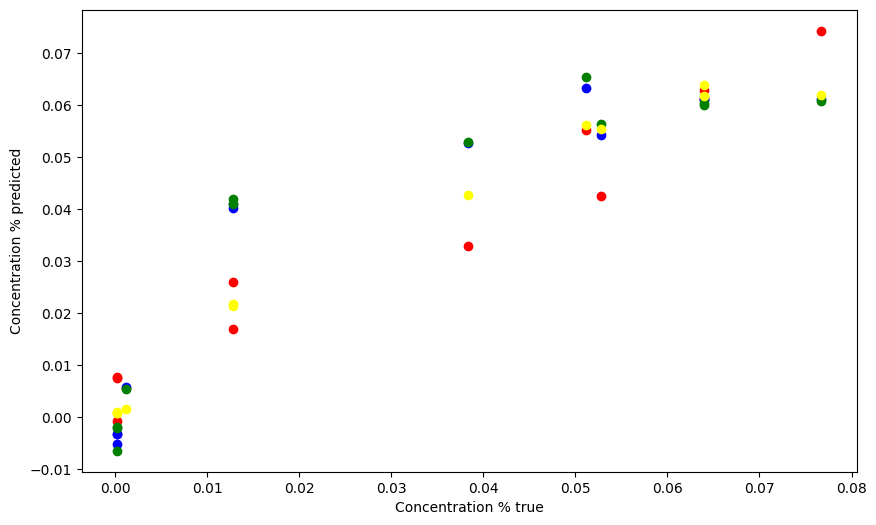

MLR red, PLS blue, PCR green, RF yellow


In [438]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions_mlr,c='red')
plt.scatter(y_test,predictionsPLS,c='blue')
plt.scatter(y_test,predictions_lr_pca,c='green')
plt.scatter(y_test,predictions_rfreg,c='yellow')
plt.xlabel('Concentration % true')
plt.ylabel('Concentration % predicted')
plt.show()
print('MLR red, PLS blue, PCR green, RF yellow')

In [439]:
metricsdata = {
    'Model': ['PCR', 'PLS', 'MLR', 'RF'],
    'MAE': [metrics.mean_absolute_error(y_test, predictions_lr_pca), metrics.mean_absolute_error(y_test, predictionsPLS), metrics.mean_absolute_error(y_test, predictions_mlr), metrics.mean_absolute_error(y_test, predictions_rfreg)],
    'MSE': [metrics.mean_squared_error(y_test, predictions_lr_pca), metrics.mean_squared_error(y_test, predictionsPLS), metrics.mean_squared_error(y_test, predictions_mlr), metrics.mean_squared_error(y_test, predictions_rfreg)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, predictions_lr_pca)), np.sqrt(metrics.mean_squared_error(y_test, predictionsPLS)), np.sqrt(metrics.mean_squared_error(y_test, predictions_mlr)), np.sqrt(metrics.mean_squared_error(y_test, predictions_rfreg))],
    'R2 train': [regressorPCR.score(X_pca_train, y_train), regressorPLS.score(X_train, y_train), regressorMLR.score(X_train, y_train), regressorRF.score(X_train, y_train)],
    'R2 test': [regressorPCR.score(X_pca_test, y_test), regressorPLS.score(X_test, y_test), regressorMLR.score(X_test, y_test), regressorRF.score(X_test, y_test)]}
metricsdf = pd.DataFrame(metricsdata)
metricsdf

,Model,MAE,MSE,RMSE,R2 train,R2 test
0,PCR,0.010692,0.000202,0.014229,0.872384,0.746875
1,PLS,0.010144,0.000187,0.013660,0.890982,0.766721
2,MLR,0.005337,0.000041,0.006429,0.988823,0.948325
3,RF,0.004120,0.000036,0.005992,0.992524,0.955115


In [440]:
Predictions = pd.concat([predcopyPCR, predcopyPLS,predcopyMLR,predcopyRF], axis=1)
Predictions.columns=['PCR','PLS','MLR','RF']
Predictions

,PCR,PLS,MLR,RF
0,-0.006400,-0.005141,0.007599,0.000876
1,0.060803,0.061220,0.074253,0.061925
2,0.041054,0.040249,0.016947,0.021447
3,0.042019,0.041055,0.026037,0.021683
4,0.056273,0.054281,0.042431,0.055445
5,0.065327,0.063219,0.055251,0.056141
6,0.005485,0.005813,0.005575,0.001608
7,0.052845,0.052785,0.032819,0.042690
8,0.059980,0.060925,0.061132,0.061717
9,-0.001841,-0.003257,-0.000671,0.001093
